#### Используя PyTorch:

1. Создать и обучить регрессионную модель, которая аппроксимирует значение функции sin(x + 2*y)exp(-(2x + y)^2) на диапазоне значений [-10;10] по х и у.
2. В качестве обучающей выборки необходимо сгенерировать 20000 точек случайным образом.
3. Разделить получившийся датасет на train / test / val в отношениях 70% / 15% / 15%, соответственно.

Результаты:
- Посчитать метрику Mean Square Error(MSE) на test.
- Нарисовать график, в котором сравнивается истинная функция и ее аппроксимированный вариант (предсказываемый моделью).

Useful links:
- https://www.geeksforgeeks.org/plotting-sine-and-cosine-graph-using-matloplib-in-python/
- https://www.tutorialspoint.com/plotting-random-points-under-sine-curve-in-python-matplotlib


In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)

In [2]:
start_point = -10
end_point = 10
num_points = 20000

In [3]:
x = np.linspace(start=start_point, stop=end_point, num=num_points)

In [4]:
x.shape

(20000,)

$y = sin(x+2) \cdot e^{-(2x+1)^2}$

In [5]:
latex_func = 'y = sin(x+2) \cdot e^{-(2x+1)^2}'

In [6]:
y1 = np.sin(x)
y2 = np.sin(x+2)*np.exp(-(2*x+1)**2)
y3 = np.exp(x)
y4 = np.exp(-(2*x+1)**2)

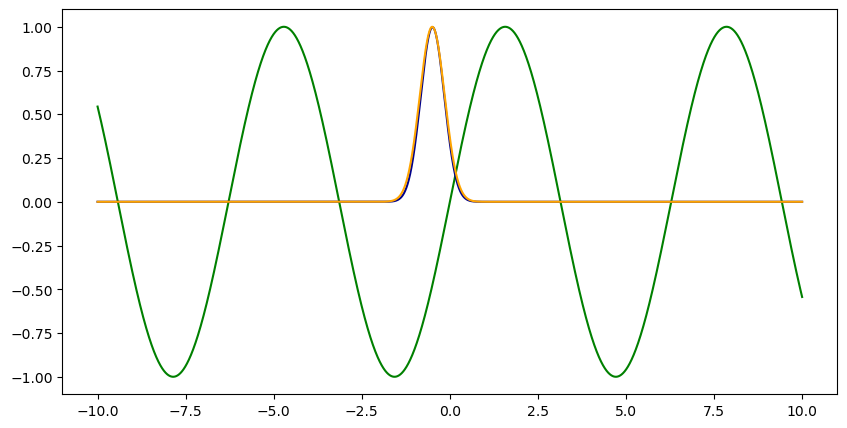

In [7]:
plt.plot(x, y1, color='green')
plt.plot(x, y2, color='darkblue')
plt.plot(x, y4, color='orange')
plt.show()

## Train Dataset

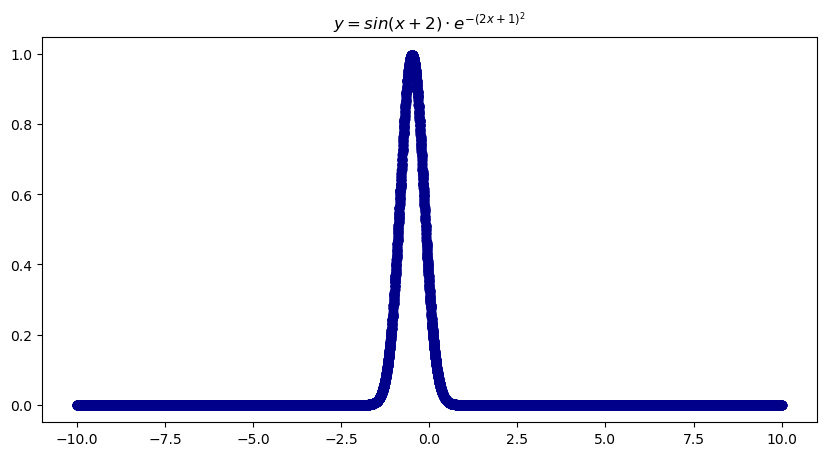

In [8]:
x_train = torch.rand(num_points)  ## generating 2000 random values from [0,1) interval
x_train = x_train * 20.0 - 10.0   ## redistributing random values to fill [-10, 10] interval 

#y_train = torch.sin(x_train)
y_train = torch.sin(x_train+2)*torch.exp(-(2*x_train+1)**2)

plt.plot(x_train.numpy(), y_train.numpy(), 'o', c='darkblue')
plt.title('$y = sin(x+2) \cdot e^{-(2x+1)^2}$');

In [9]:
y_train.shape

torch.Size([20000])

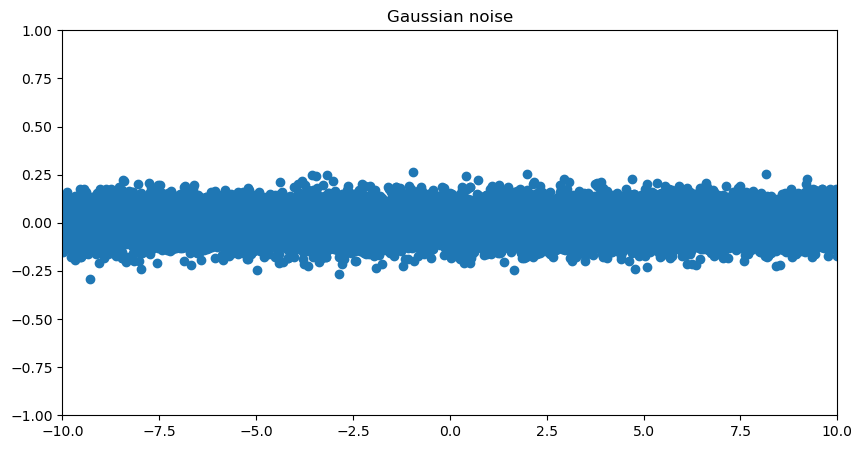

In [10]:
noise = torch.randn(y_train.shape) / 15.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

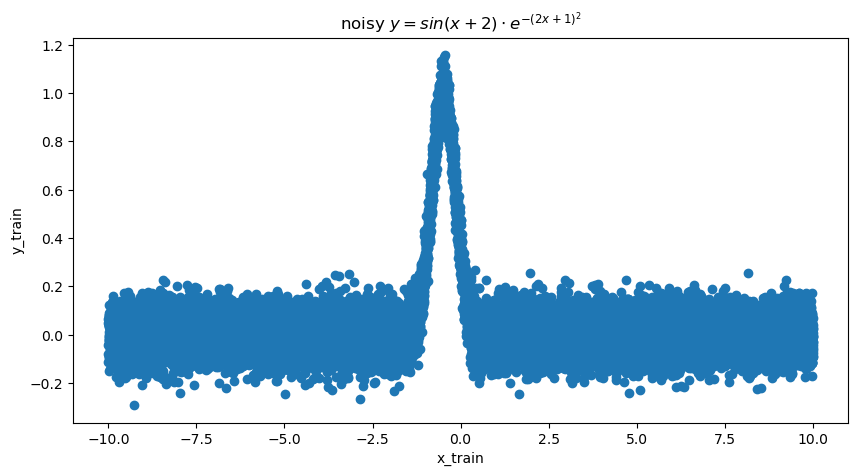

In [11]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy $y = sin(x+2) \cdot e^{-(2x+1)^2}$')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [12]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

## Validation Dataset

In [13]:
num_points*0.15

3000.0

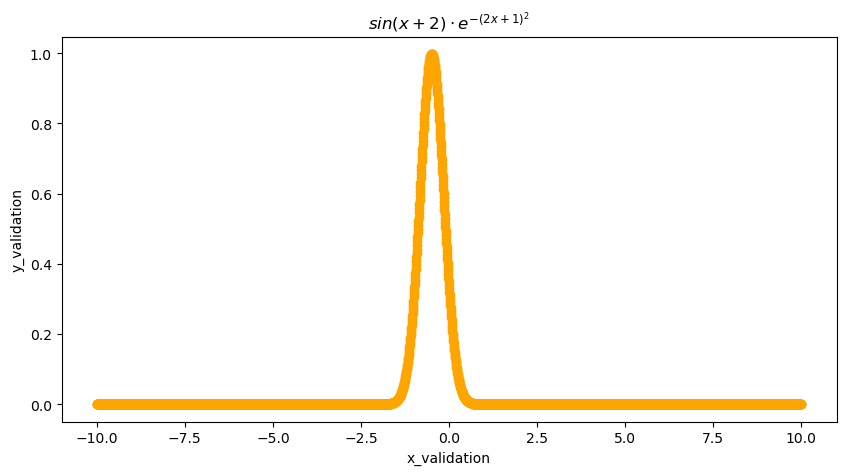

In [14]:
x_val = np.linspace(start_point, end_point, int(num_points*0.15)) ## 15% for validation set
y_val = np.sin(x_val+2)*np.exp(-(2*x_val+1)**2)   ##(x_validation.data)
#plt.figure(figsize=(12,5))
plt.plot(x_val, y_val, 'o', c='orange')
plt.title('$sin(x+2) \cdot e^{-(2x+1)^2}$')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [15]:
x_validation = torch.linspace(-10, 10, int(num_points*0.15))
y_validation = torch.sin(x_validation+2)*np.exp(-(2*x_validation+1)**2)  ##sin(x_validation.data)

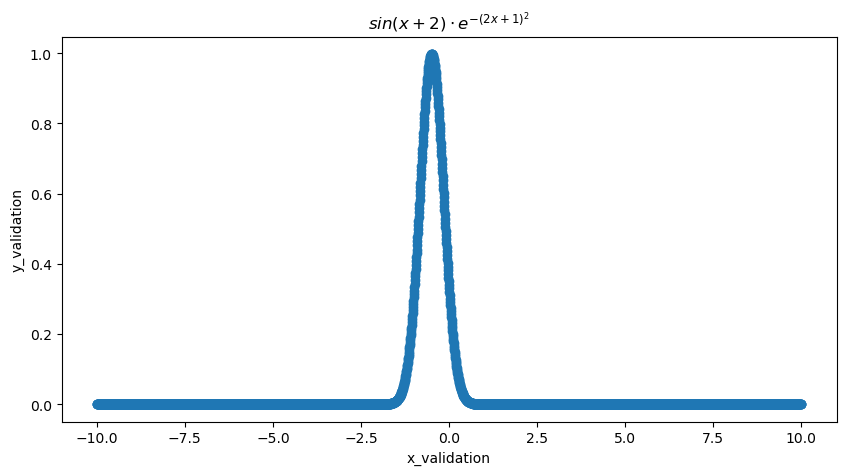

In [16]:
#plt.figure(figsize=(12,5))
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('$sin(x+2) \cdot e^{-(2x+1)^2}$')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [17]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

## Model construction

In [18]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(3)

## Prediction

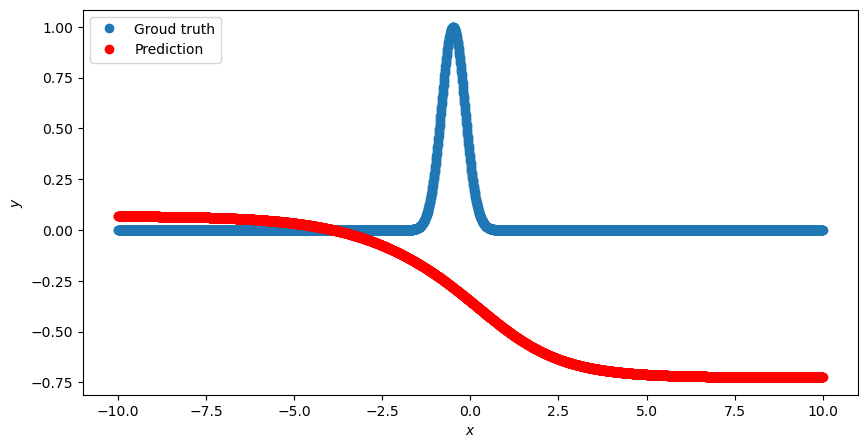

In [19]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

## Optimizer

In [20]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

## Loss function

In [21]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

## Training procedure

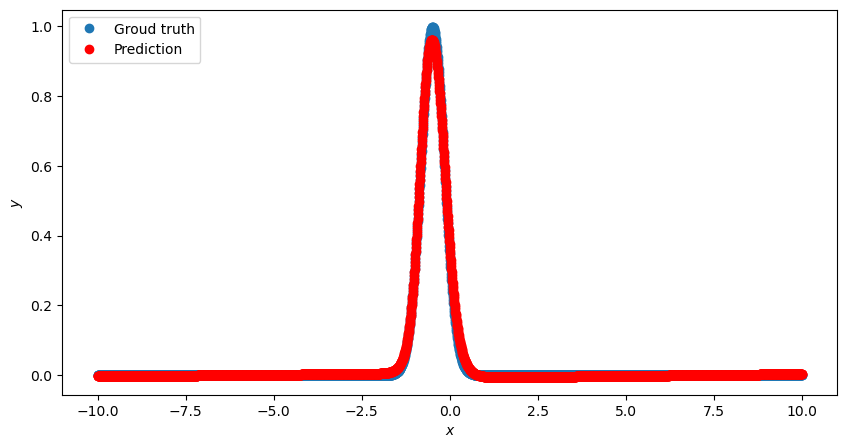

In [22]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)